In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# read data for normal and CKD cats
data_dir = '../Data/big_cats/'
noCKD = pd.read_excel(data_dir + 'BiochemicalChangesinCKDAbbrevColours20160828.xlsx', sheet_name='NormalFelidsn=1319')
withCKD = pd.read_excel(data_dir + 'BiochemicalChangesinCKDAbbrevColours20160828.xlsx', sheet_name='CKDn=163')
lowUSG = pd.read_excel(data_dir + 'BiochemicalChangesinCKDAbbrevColours20160828.xlsx', sheet_name='LowUSGn=112')

# set CKD status of each
withCKD['CKD_status'] = True
noCKD['CKD_status'] = False
lowUSG['CKD_status'] = 'low USG'

# combine data frames to get time series data with CKD status
frames = [withCKD, noCKD, lowUSG]
data = pd.concat(frames)
data.sample(1)

,ID,ARKS Number,Animal Name,Species,Date,Low USG?,urea (mmol/L),Uraemia,Creatinine (umol/L),Hypercreatinaemia?,Total Plasma Protein (g/L),hyperproteinaemia,Serum Albumin (g/L),hyperalbuminaemia,Globulins (g/L),Changes in globulins,Haematocrit (%),Anaemic?,Potassium (mmol/L),Changes in potassium,Calcium (mmol/L),Changes in calcium,Phosphate (mmol/L),Hyperphosphataemia?,Sodium (mmol/L),Changes in sodium,Chloride (mmol/L),Changes in chloride,Bicarbonate,Changes in bicarbonate,Glucose,CK (U/L),ALP (U/L),ALT (U/L),AST,Amylase,-,Cholesterol (mmol/L),Bilirubin,Serum/plasma appearance,Comments:,CKD_status
619,202,950078,Dani,Cheetah,2004-02-24,False,14.4,False,292,False,67,normal,33,normal,34,normal,36,normal,4.3,normal,2.82,normal,1.64,normal,156,normal,121,normal,-,-,9.7,313,8,157,72,1642,-,-,3,-,-,False


In [4]:
print('number of cats')
print(len(data['ARKS Number'].unique()))
print('number of species')
print(len(data['Species'].unique()))
print('number of records')
print(len(data))

number of cats
320
number of species
18
number of records
1594


In [5]:
data[data['ARKS Number'] == 950061]

,ID,ARKS Number,Animal Name,Species,Date,Low USG?,urea (mmol/L),Uraemia,Creatinine (umol/L),Hypercreatinaemia?,Total Plasma Protein (g/L),hyperproteinaemia,Serum Albumin (g/L),hyperalbuminaemia,Globulins (g/L),Changes in globulins,Haematocrit (%),Anaemic?,Potassium (mmol/L),Changes in potassium,Calcium (mmol/L),Changes in calcium,Phosphate (mmol/L),Hyperphosphataemia?,Sodium (mmol/L),Changes in sodium,Chloride (mmol/L),Changes in chloride,Bicarbonate,Changes in bicarbonate,Glucose,CK (U/L),ALP (U/L),ALT (U/L),AST,Amylase,-,Cholesterol (mmol/L),Bilirubin,Serum/plasma appearance,Comments:,CKD_status
82,1652,950061,Mohan,Tiger,2012-06-06,True,46.4,azotaemia,925,hypercreatininaemia,99,hyperproteinaemia,40,normal,59,hyperglobulinaemia,48,normal,3.3,hypokalaemia,2.74,normal,4.97,hyperphosphataemia,158,normal,113,normal,-,-,9.2,-,21,132,-,-,normal,9.6,12,-,-,True
118,1641,950061,Mohan,Tiger,2012-06-07,True,88.8,azotaemia,932,hypercreatininaemia,93,hyperproteinaemia,41,normal,52,hyperglobulinaemia,49,normal,3.7,normal,2.48,normal,4.17,hyperphosphataemia,146,normal,109,hypochloraemia,11,normal,7.4,174,8,159,161,-,high,10.3,1,clear,-,True
142,1642,950061,Mohan,Tiger,2011-04-20,True,22,azotaemia,393,hypercreatininaemia,70,normal,37,normal,33,normal,44,normal,4,normal,2.34,normal,1.81,normal,152,normal,126,normal,14,normal,7.5,221,5,152,134,-,normal,6.4,1,-,-,True
26,1675,950061,Mohan,Tiger,2003-07-08,False,14.2,False,190,False,73,normal,34,normal,39,normal,40,normal,4.2,normal,2.9,normal,1.4,normal,147,normal,118,normal,12,normal,4.7,65,13,57,21,-,normal,7.6,2,normal,-,False
49,1656,950061,Mohan,Tiger,2006-01-31,False,10.1,False,220,False,53,normal,24,hypoalbuminaemia,29,normal,44,normal,4.3,normal,2.3,normal,1.4,normal,145,normal,115,normal,13,normal,6.1,142,9,90,66,-,normal,4.8,1,normal,-,False
199,1677,950061,Mohan,Tiger,2007-07-09,False,11.5,False,180,False,77,normal,34,normal,43,normal,35,normal,3.6,normal,2.3,normal,1.8,normal,151,normal,120,normal,16,normal,6.6,62,5,48,18,-,normal,8,1,normal,-,False
207,1673,950061,Mohan,Tiger,2001-08-22,False,13.5,False,200,False,69,normal,33,normal,36,normal,31,normal,4.6,normal,2.2,normal,1.4,normal,155,normal,122,normal,16,normal,4.9,67,6,40,20,-,normal,6.2,3,-,-,False
237,1654,950061,Mohan,Tiger,2004-10-14,False,10.9,False,240,False,71,normal,34,normal,37,normal,45,normal,4.1,normal,2.4,normal,1.9,normal,151,normal,117,normal,17,normal,8.1,123,10,66,52,-,normal,6.1,9,-,-,False
239,1657,950061,Mohan,Tiger,2010-05-19,False,14.7,False,330,False,82,normal,34,normal,48,normal,48,normal,3.9,normal,2.4,normal,2,normal,148,normal,118,normal,17,normal,8.5,158,13,195,147,-,normal,7.6,3,normal,-,False
255,1674,950061,Mohan,Tiger,2003-01-13,False,12.2,False,290,False,73,normal,36,normal,37,normal,34,normal,4.4,normal,2.5,normal,2,normal,151,normal,120,normal,17,normal,4.6,73,6,55,21,-,normal,5.7,4,haemolysed,-,False


In [12]:
data_indexed = data.set_index(['ARKS Number', 'Date'])
data_indexed.sort_index(inplace=True)
data_indexed

ID     Animal Name  \
ARKS Number Date                                                
190         1997-07-17 00:00:00          1924            Fury   
            1998-04-01 00:00:00          1925            Fury   
262         1995-06-20 00:00:00          1937          Tiamat   
            1998-04-08 00:00:00          1938          Tiamat   
            2001-08-08 00:00:00          1778          Tiamat   
263         1995-08-10 00:00:00          1939          Ishtar   
            1996-07-19 00:00:00          1775          Ishtar   
            1999-11-10 00:00:00          1940          Ishtar   
            2000-03-22 00:00:00          1776          Ishtar   
            2001-08-08 00:00:00          1777          Ishtar   
200003      2010-06-25 00:00:00           146         Delilah   
670005      1988-03-29 00:00:00           513         Quintus   
            1988-05-09 00:00:00           515         Quintus   
            1988-05-19 00:00:00           512         Quintus   
700022      1990-01-02 00:00:00           516             Gai   
720019      1989-06-14 00:00:00           422        Lucretia   
730023      1991-12-11 00:00:00           421          Robert   
            1992-03-17 00:00:00            49          Robert   
730024      1989-05-04 00:00:00           423          Caesar   
            1990-05-01 00:00:00           573          Caesar   
750005      1992-03-20 00:00:00           826         Katamai   
            1993-03-03 00:00:00           825         Katamai   
            1994-05-18 00:00:00           828         Katamai   
            1995-02-08 00:00:00           827         Katamai   
750011      1989-03-07 00:00:00           424           X-Ray   
            1990-05-31 00:00:00           425           X-Ray   
            1990-07-24 00:00:00           426           X-Ray   
760022      1990-07-02 00:00:00          1528          Dianne   
            1997-03-19 00:00:00          1529          Dianne   
760038      1989-06-15 00:00:00          1521               F   
770005      1994-11-04 00:00:00           859          Rhonda   
            1994-12-07 00:00:00           860          Rhonda   
770006      1995-05-24 00:00:00           876       Cassandra   
            1996-10-15 00:00:00          1243       Cassandra   
            1996-11-01 00:00:00          1242       Cassandra   
            1997-03-25 00:00:00           875       Cassandra   
780001      1994-01-21 00:00:00          1840         Delores   
            1994-02-03 00:00:00          1841         Delores   
            1997-12-12 00:00:00          1951         Delores   
            1998-10-10 00:00:00          1952         Delores   
780049      1993-03-24 00:00:00          1887         Blackie   
780127      1985-09-09 00:00:00           462           Masai   
            1986-08-25 00:00:00           463           Masai   
            1987-04-02 00:00:00           465           Masai   
            1987-04-12 00:00:00           464           Masai   
790025      1996-03-16 00:00:00          1256            Hawk   
            1998-07-15 00:00:00           903            Hawk   
790026      1996-05-02 00:00:00          1184           Helen   
            1999-05-15 00:00:00          1181           Helen   
            2000-09-28 00:00:00          1182           Helen   
            2001-01-03 00:00:00          1183           Helen   
790032      1991-07-24 00:00:00           578           Choro   
790035      1993-07-15 00:00:00           597          Spring   
            1994-03-29 00:00:00           596          Spring   
            1995-08-24 00:00:00           595          Spring   
790036      1987-06-10 00:00:00           536             Ali   
            1993-01-28 00:00:00           430             Ali   
            1993-05-10 00:00:00           431             Ali   
            1996-07-18 00:00:00           471             Ali   
            1996-07-18 00:00:00           432             Ali   
790037      1

In [13]:
data_indexed.xs(950061)

,ID,Animal Name,Species,Low USG?,urea (mmol/L),Uraemia,Creatinine (umol/L),Hypercreatinaemia?,Total Plasma Protein (g/L),hyperproteinaemia,Serum Albumin (g/L),hyperalbuminaemia,Globulins (g/L),Changes in globulins,Haematocrit (%),Anaemic?,Potassium (mmol/L),Changes in potassium,Calcium (mmol/L),Changes in calcium,Phosphate (mmol/L),Hyperphosphataemia?,Sodium (mmol/L),Changes in sodium,Chloride (mmol/L),Changes in chloride,Bicarbonate,Changes in bicarbonate,Glucose,CK (U/L),ALP (U/L),ALT (U/L),AST,Amylase,-,Cholesterol (mmol/L),Bilirubin,Serum/plasma appearance,Comments:,CKD_status
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-04-14,1658,Mohan,Tiger,False,6.4,False,95,False,82,normal,31,normal,51,normal,28,normal,-,-,2.31,normal,1.48,normal,-,-,-,-,-,-,20.9,-,52,38,-,942,low,2.9,9,-,-,False
1996-06-22,1659,Mohan,Tiger,False,11.55,False,216,False,80,normal,34,normal,46,normal,51,normal,-,-,2.84,normal,2.12,normal,-,-,-,-,-,-,4.84,-,100,18,-,937,normal,7.8,6,-,-,False
1996-10-01,1660,Mohan,Tiger,False,9,False,222,False,74,normal,34,normal,40,normal,34,normal,4.3,normal,2.65,normal,1.99,normal,160,hypernatraemia,126,normal,-,-,5.63,-,75,35,-,-,normal,6.8,1,-,-,False
1996-10-15,1661,Mohan,Tiger,False,20.6,azotaemia,211,False,72,normal,34,normal,38,normal,38,normal,4.55,normal,2.6,normal,2.17,normal,160,hypernatraemia,121,normal,-,-,4.3,-,72,111,-,-,normal,6.9,0,-,-,False
1996-10-28,1663,Mohan,Tiger,False,10.8,False,290,False,75,normal,32,normal,43,normal,36,normal,4.6,normal,2.8,normal,2,normal,148,normal,111,normal,20,normal,3.6,111,40,39,24,-,normal,6.9,2,-,-,False
1997-02-14,1662,Mohan,Tiger,False,13.3,False,218,False,88,hyperproteinaemia,40,normal,48,normal,40,normal,4.7,normal,2.69,normal,2.14,normal,162,hypernatraemia,124,normal,-,-,2.2,-,61,29,-,-,normal,7.4,16,-,-,False
1997-03-14,1664,Mohan,Tiger,False,13.5,False,224,False,95,hyperproteinaemia,42,normal,53,hyperglobulinaemia,52,normal,4.9,normal,2.61,normal,2.2,normal,162,hypernatraemia,125,normal,-,-,4,-,42,32,-,-,normal,7.7,51,-,-,False
1997-03-18,1665,Mohan,Tiger,False,14.1,False,205,False,82,normal,37,normal,45,normal,35,normal,4.7,normal,2.64,normal,1.94,normal,160,hypernatraemia,125,normal,-,-,4.6,-,60,26,-,-,normal,7.6,5,-,-,False
1997-04-07,1653,Mohan,Tiger,False,9.6,False,313,False,85,hyperproteinaemia,38,normal,47,normal,-,-,4.53,normal,2.8,normal,1.9,normal,162,hypernatraemia,125,normal,-,-,5.4,-,54,25,-,-,normal,7.8,4,-,-,False


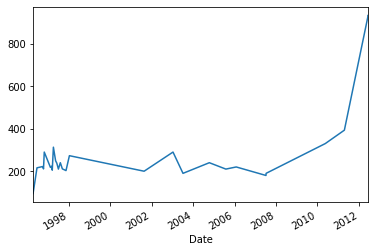

In [22]:
data_indexed.xs(950061)['Creatinine (umol/L)'].plot()

In [28]:
data.plot.scatter('Total Plasma Protein (g/L)', 'Glucose')

ValueError: scatter requires x column to be numeric

In [ ]:
noCKD.columns

In [ ]:
withCKD.columns

In [ ]:
lowUSG.columns

In [ ]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

In [ ]:
intersection(withCKD['ARKS Number'].values, noCKD['ARKS Number'].values)

In [ ]:
tab2[tab2['ARKS Number']==900485]

In [ ]:
tab1[tab1['ARKS Number']==900485]